# Detector De Máscara Facial

### Dependências

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.callbacks import TensorBoard, ModelCheckpoint, History
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model

### Importação do Dataset
#### x_train, y_train

In [2]:
TRAIN_DIR = "./Train-2"
train_set = ImageDataGenerator(rescale=1.0/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


In [3]:
train_set = train_set.flow_from_directory(TRAIN_DIR, batch_size=10, target_size=(180, 180))

Found 1315 images belonging to 2 classes.


#### x_validation, y_validation

In [4]:
VALIDATION_DIR = "./Validation-2"
validation_set = ImageDataGenerator(rescale=1.0/255)

In [5]:
validation_set = validation_set.flow_from_directory(VALIDATION_DIR, batch_size=10, target_size=(180, 180))

Found 194 images belonging to 2 classes.


In [6]:
print('Training data classes: ', train_set.class_indices)
print('Validation data classes: ', validation_set.class_indices)

Training data classes:  {'WithMask': 0, 'WithoutMask': 1}
Validation data classes:  {'WithMask': 0, 'WithoutMask': 1}


In [7]:
x_train, y_train = next(train_set)
print("Training data shape: x_train = ", x_train.shape)
print("Training data shape: y_train = ", y_train.shape)

Training data shape: x_train =  (10, 180, 180, 3)
Training data shape: y_train =  (10, 2)


### Convolutional Neural Network

In [8]:
model = Sequential([ 
    Conv2D(100, (3,3), activation='relu', input_shape = (180, 180, 3)), #input_shape = h, w, RGB
    MaxPooling2D(2,2),
  
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
       
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax'), # ou sigmoid
])

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 100)       90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 184900)            0         
_________________________________________________________________
dropout (Dropout)            (None, 184900)            0         
_________________________________________________________________
dense (Dense)                (None, 50)                9

#### Salvar melhor modelo

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

#### Deep Learning

In [11]:
history = model.fit(train_set, epochs=10, validation_data=validation_set, callbacks=[checkpoint])

Epoch 1/10
132/132 [==============================] - 76s 483ms/step - loss: 0.8415 - acc: 0.4784 - val_loss: 0.5429 - val_acc: 0.7732
INFO:tensorflow:Assets written to: model-001/assets
Epoch 2/10
132/132 [==============================] - 67s 508ms/step - loss: 0.6058 - acc: 0.6857 - val_loss: 0.4268 - val_acc: 0.8041
INFO:tensorflow:Assets written to: model-002/assets
Epoch 3/10
132/132 [==============================] - 74s 560ms/step - loss: 0.4595 - acc: 0.7995 - val_loss: 0.1748 - val_acc: 0.9485
INFO:tensorflow:Assets written to: model-003/assets
Epoch 4/10
132/132 [==============================] - 73s 551ms/step - loss: 0.3074 - acc: 0.8915 - val_loss: 0.1428 - val_acc: 0.9330
INFO:tensorflow:Assets written to: model-004/assets
Epoch 5/10
132/132 [==============================] - 73s 550ms/step - loss: 0.2734 - acc: 0.8909 - val_loss: 0.1116 - val_acc: 0.9742
INFO:tensorflow:Assets written to: model-005/assets
Epoch 6/10
132/132 [==============================] - 71s 534ms/s

### Performance

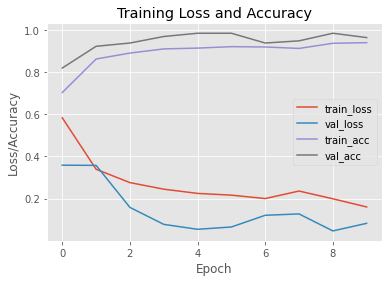

In [72]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()